<a href="https://colab.research.google.com/github/AndrewRomitti/CNN_Dementia/blob/main/FASTAIAlzheimers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#VGG16 Convolutional Neural Network - Trained with FastAI API
##Fast-AI Docs - https://docs.fast.ai/tutorial.vision.html
* Used this documentation on their vision tutorial for help on training the model

Credit for Pil-Loader Solution - https://stackoverflow.com/questions/52439364/how-to-convert-rgb-images-to-grayscale-in-pytorch-dataloader


In [ ]:
import torch
import fastai
from fastai import *
from fastai.vision.all import *
from fastai.metrics import error_rate,accuracy
import numpy as np
import io
from PIL import Image
import torchvision.transforms as transforms

In [ ]:
torch.cuda.get_device_name(0)

In [ ]:
fastai.__version__

'2.7.9'

In [ ]:
#SETTINGS
batch_size = 64
image_size = 224
workers = 8

batch_tfms = [*aug_transforms(max_rotate=7.5,
                           max_zoom=1.15,
                           max_lighting=0.15,
                           max_warp=0.15,
                           p_affine=0.8, p_lighting = 0.8,
                           xtra_tfms=[
                            Rotate(max_deg=45, p=1.),
                            RandomErasing(p=1., max_count=10, min_aspect=0.5, sl=0.2, sh=0.2),
                            RandomResizedCrop(p=1., size=256),
                            Brightness(max_lighting=0.2, p=1.),
                            CropPad(size=256),
                            Warp(magnitude=0.2, p=1.0)])
                           ,Normalize.from_stats(*imagenet_stats)]

SyntaxError: ignored

In [ ]:
directory = '/content/drive/MyDrive/Colab Notebooks/Alzheimer_s Dataset/'

In [ ]:
data = ImageDataLoaders.from_folder(directory,train='train',valid='test',ds_tfms=batch_tfms,size=image_size/2,bs=batch_size,num_workers=workers)

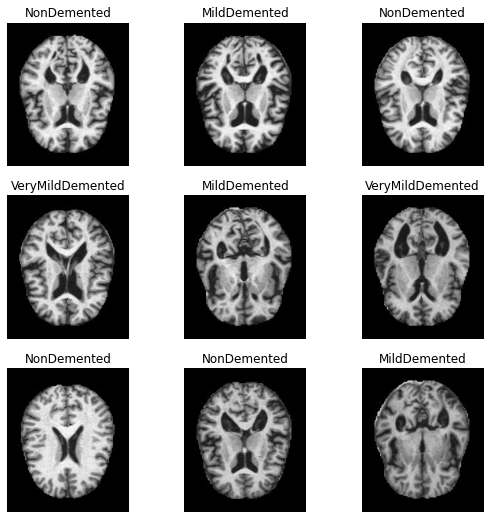

In [ ]:
data.show_batch()

In [ ]:
dir(models)

['ResNet',
 'SqueezeNet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'alexnet',
 'all',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'squeezenet1_0',
 'squeezenet1_1',
 'tvm',
 'unet',
 'vgg11_bn',
 'vgg13_bn',
 'vgg16_bn',
 'vgg19_bn',
 'xresnet']

In [ ]:
learn = cnn_learner(data, models.vgg16_bn, metrics=[accuracy], loss_func=CrossEntropyLossFlat(),)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64

  0%|          | 0.00/528M [00:00<?, ?B/s]

In [ ]:
learn.summary()

In [ ]:
learn.unfreeze()

SuggestedLRs(valley=0.0010000000474974513)

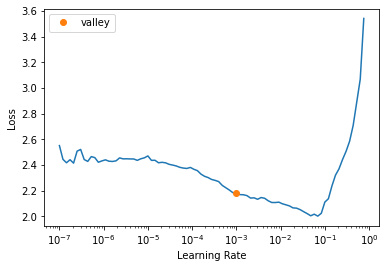

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,1.158650,2.512782,0.479281,01:12
1,0.635120,1.758806,0.541048,01:11
2,0.302488,1.867568,0.614543,01:11
3,0.089778,1.076704,0.734167,01:12
4,0.027319,1.099090,0.750586,01:11


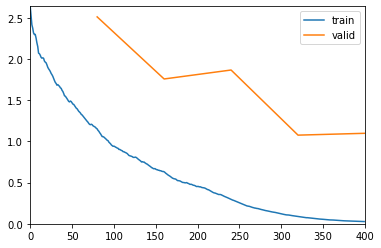

In [ ]:
learn.fit_one_cycle(5,lr_max=slice(10e-4,10e-3),cbs=[ShowGraphCallback()])

In [ ]:
model_directory = Path('/content/drive/MyDrive/Colab Notebooks/Alzheimer_s Dataset/models/')
learn.model_dir = model_directory
learn.save('checkpoint_1')

Path('/content/drive/MyDrive/Colab Notebooks/Alzheimer_s Dataset/models/checkpoint_1.pth')

epoch,train_loss,valid_loss,accuracy,time
0,0.323977,9.631478,0.508991,01:12
1,0.420923,1.490705,0.652854,01:13
2,0.194842,1.746286,0.677091,01:11
3,0.059977,1.018422,0.729476,01:12
4,0.016389,0.985217,0.735731,01:12


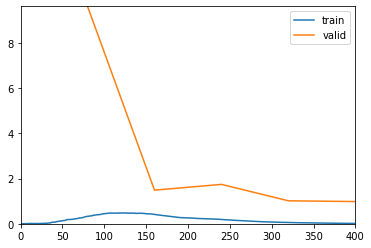

In [ ]:
learn.load('checkpoint_1')
learn.unfreeze()

learn.fit_one_cycle(5, lr_max=slice(10e-4,10e-3),cbs=[ShowGraphCallback()])

In [ ]:
learn.save('checkpoint_2')

Path('/content/drive/MyDrive/Colab Notebooks/Alzheimer_s Dataset/models/checkpoint_2.pth')

In [ ]:
Fbatch_tfms = [*aug_transforms(max_rotate=7.5,
                           max_zoom=1.15,
                           max_lighting=0.15,
                           max_warp=0.15,
                           p_affine=0.8, p_lighting = 0.8,
                           xtra_tfms=[
                            Rotate(max_deg=45, p=1.),
                            RandomErasing(p=1., max_count=10, min_aspect=0.5, sl=0.2, sh=0.2),
                            RandomResizedCrop(p=1., size=256),
                            Brightness(max_lighting=0.2, p=1.),
                            CropPad(size=256),
                            Warp(magnitude=0.2, p=1.0)])
                           ,Normalize.from_stats(*imagenet_stats)]

In [ ]:
dataF = ImageDataLoaders.from_folder(directory,train='train',valid='test',ds_tfms=Fbatch_tfms,size=image_size,bs=batch_size,num_workers=workers)

In [ ]:
learn = cnn_learner(dataF, models.vgg16_bn, pretrained=False, metrics=[accuracy])

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
model_final_directory = Path('/content/drive/MyDrive/Colab Notebooks/Alzheimer_s Dataset/models/')
learn.model_dir = model_final_directory
learn.load('checkpoint_2')

SuggestedLRs(valley=3.0199516913853586e-05)

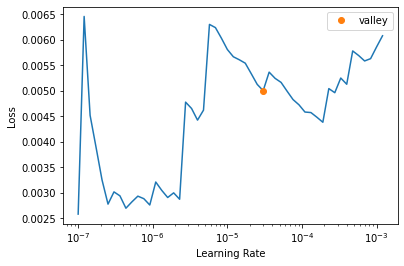

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,0.006555,0.979139,0.738077,01:12
1,0.004718,1.206170,0.738858,01:11
2,0.042814,9.745631,0.504300,01:11
3,0.086558,4.242979,0.530883,01:12
4,0.069846,6.544649,0.501173,01:11
5,0.055146,1.575171,0.684910,01:11
6,0.049809,1.201159,0.704457,01:12
7,0.047121,5.937231,0.510555,01:11
8,0.019933,1.126876,0.726349,01:11
9,0.030032,10.048034,0.501173,01:12


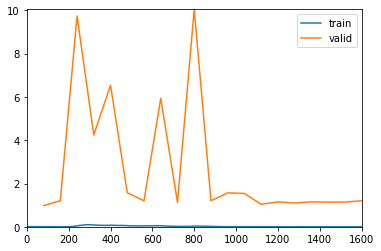

In [ ]:
learn.fit_one_cycle(20,lr_max=10e-4,cbs=[ShowGraphCallback()])

In [ ]:
learn.save('checkpoint_3')

Path('/content/drive/MyDrive/Colab Notebooks/Alzheimer_s Dataset/models/checkpoint_3.pth')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

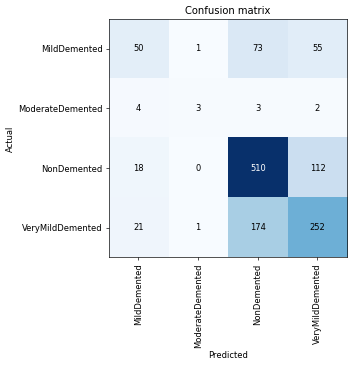

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6),dpi=60)

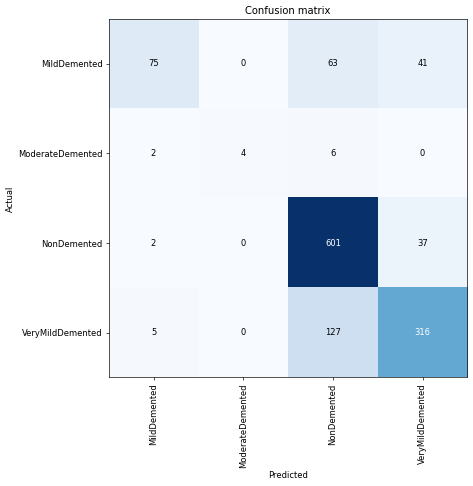

In [ ]:
interp.plot_confusion_matrix(figsize=(8,8),dpi=60)

In [ ]:
learn.load('checkpoint_3')

In [ ]:
learn.save('/content/drive/MyDrive/Colab Notebooks/Alzheimer_s Dataset/models/final_model2.pkl')

In [ ]:
def predict(image):
  pred, pred_idx, probs = learner.predict(image)
  lbl_pred = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
  return lbl_pred

In [ ]:
predict('/content/drive/MyDrive/Colab Notebooks/Alzheimer_s Dataset/train/ModerateDemented/moderateDem0.jpg')

'Prediction: ModerateDemented; Probability: 0.9489'

In [ ]:
learner = load_learner('/content/drive/MyDrive/Colab Notebooks/Alzheimer_s Dataset/models/final_model.pkl')

In [ ]:
learner.predict('/content/drive/MyDrive/Colab Notebooks/Alzheimer_s Dataset/test/NonDemented/26 (65).jpg')

('MildDemented',
 TensorBase(0),
 TensorBase([5.5906e-01, 1.1026e-02, 6.8820e-05, 4.2985e-01]))

In [ ]:
predict('')

'Prediction: ModerateDemented; Probability: 0.9489'

In [ ]:
import io
from PIL import Image
from PIL import *
import torchvision.transforms as transforms

In [ ]:
learner = load_learner('/content/drive/MyDrive/Colab Notebooks/Alzheimer_s Dataset/models/final_model.pkl')

In [ ]:
def transform_image(image_bytes):
    my_transforms = transforms.Compose([transforms.Resize(224),
                                        transforms.ToTensor(),
                                        transforms.Normalize(
                                            (0.5),(0.5))])
    image = Image.open(io.BytesIO(image_bytes))
    return my_transforms(image).unsqueeze(0)

In [ ]:
classes = learner.dls.vocab
def predict(img):
  prediction = learner.predict(load_image(img))
  probs_list = prediction[2].numpy()
  return{
      'index':classes[prediction[1].item()],
      'probs':{c:round(float(probs_list[i]),5) for (i,c) in enumerate(classes)}
  }

predict('/content/drive/MyDrive/Colab Notebooks/Alzheimer_s Dataset/train/MildDemented/mildDem120.jpg')

In [ ]:
def pil_loader(path, mode="RGB"):
    with open(path, "rb") as f:
        img = Image.open(f)
        return img.convert(mode)

In [ ]:
def get_prediction(image_bytes):
    tensor = transform_image(image_bytes=image_bytes)
    prediction = learner.predict(tensor)
    return predicted_idx[1]

In [ ]:
def predict():
  byteImgIO = io.BytesIO()
  byteImg = pil_loader('/content/drive/MyDrive/Colab Notebooks/Alzheimer_s Dataset/train/MildDemented/mildDem120.jpg')
  byteImg.save(byteImgIO, "JPEG")
  byteImgIO.seek(0)
  byteImg = byteImgIO.read()
  return get_prediction(byteImg)

In [ ]:
predict()

In [ ]:
learner.predict('/content/drive/MyDrive/Colab Notebooks/Alzheimer_s Dataset/train/MildDemented/mildDem120.jpg')

('MildDemented',
 TensorBase(0),
 TensorBase([9.9998e-01, 1.6469e-05, 7.2862e-12, 1.0911e-07]))

In [ ]:
pred, pred_idx, probs = learner.predict('/content/drive/MyDrive/Colab Notebooks/Alzheimer_s Dataset/train/MildDemented/mildDem120.jpg')

In [ ]:
lbl_pred = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
print(lbl_pred)

Prediction: MildDemented; Probability: 1.0000
